In [1]:
import pandas as pd
import json
# df = pd.json_normalize('1650608.json')

In [2]:
#open json file
with open ('1650608.json', encoding='utf8') as f:
    data = json.load(f)

In [3]:
#access data then access values from key playerIdNameDictionary
values = data['playerIdNameDictionary']

In [4]:
values

{'125547': 'Rodrigo de Paul',
 '127604': 'Ángel Correa',
 '303728': 'Nahuel Molina',
 '25191': 'Axel Witsel',
 '115472': 'Yannick Carrasco',
 '102173': 'Felipe',
 '362758': 'Matheus Cunha',
 '91978': 'Geoffrey Kondogbia',
 '377309': 'Ivo Grbic',
 '80241': 'Antoine Griezmann',
 '361812': 'Reinildo',
 '362431': 'João Félix',
 '76662': 'Jan Oblak',
 '80764': 'Koke',
 '91213': 'Álvaro Morata',
 '112161': 'Saúl Ñíguez',
 '344156': 'Mario Hermoso',
 '254582': 'Marcos Llorente',
 '433966': 'Marco Moreno',
 '433107': 'Antonio Gomis',
 '39722': 'David Alaba',
 '73798': 'Thibaut Courtois',
 '33404': 'Eden Hazard',
 '337782': 'Vinícius Júnior',
 '337879': 'Éder Militão',
 '347862': 'Rodrygo',
 '20874': 'Luka Modric',
 '296337': 'Ferland Mendy',
 '353423': 'Aurélien Tchouaméni',
 '369109': 'Eduardo Camavinga',
 '31772': 'Toni Kroos',
 '104010': 'Antonio Rüdiger',
 '106875': 'Nacho',
 '106883': 'Daniel Carvajal',
 '137467': 'Marco Asensio',
 '144890': 'Dani Ceballos',
 '238901': 'Jesús Vallejo',
 '

In [5]:
#normalize json
df = pd.json_normalize(data['events'], sep='_')
pd.set_option('display.max_columns', None)
df = df[['id', 'playerId', 'teamId', 'minute', 'second', 'type_displayName', 'outcomeType_displayName', 'x', 'y', 'endX', 'endY']]
df

,id,playerId,teamId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY
0,2.462224e+09,NaN,52,0,0.0,Start,Successful,0.0,0.0,NaN,NaN
1,2.462224e+09,NaN,63,0,0.0,Start,Successful,0.0,0.0,NaN,NaN
2,2.462224e+09,347862.0,52,0,0.0,Pass,Successful,50.4,50.3,34.3,48.9
3,2.462224e+09,337879.0,52,0,1.0,Pass,Successful,30.0,41.8,31.0,44.9
4,2.462224e+09,39722.0,52,0,3.0,Pass,Unsuccessful,31.1,44.9,67.1,6.1
...,...,...,...,...,...,...,...,...,...,...,...
1628,2.462296e+09,NaN,63,94,32.0,End,Successful,0.0,0.0,NaN,NaN
1629,2.462296e+09,NaN,63,0,0.0,End,Successful,0.0,0.0,NaN,NaN
1630,2.462296e+09,NaN,52,0,0.0,End,Successful,0.0,0.0,NaN,NaN
1631,2.462144e+09,NaN,52,0,0.0,FormationSet,Successful,0.0,0.0,NaN,NaN


In [6]:
#display only type_displayName End
df[df['type_displayName'] == 'End']

,id,playerId,teamId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY
771,2.462258e+09,NaN,52,47,0.0,End,Successful,0.0,0.0,NaN,NaN
772,2.462258e+09,NaN,63,47,0.0,End,Successful,0.0,0.0,NaN,NaN
1627,2.462296e+09,NaN,52,94,32.0,End,Successful,0.0,0.0,NaN,NaN
1628,2.462296e+09,NaN,63,94,32.0,End,Successful,0.0,0.0,NaN,NaN
1629,2.462296e+09,NaN,63,0,0.0,End,Successful,0.0,0.0,NaN,NaN
1630,2.462296e+09,NaN,52,0,0.0,End,Successful,0.0,0.0,NaN,NaN


In [7]:
#divide_halves with checking the index from statsbomb
first_half = df.loc[:772, :]
second_half = df.loc[773:1628, :]
second_half.head(5)

,id,playerId,teamId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY
773,2.462266e+09,NaN,52,45,0.0,Start,Successful,0.0,0.0,NaN,NaN
774,2.462266e+09,NaN,63,45,0.0,Start,Successful,0.0,0.0,NaN,NaN
775,2.462266e+09,125547.0,63,45,0.0,Pass,Successful,49.8,49.9,34.2,33.9
776,2.462266e+09,25191.0,63,45,3.0,Pass,Successful,34.7,34.6,39.3,42.7
777,2.462266e+09,91978.0,63,45,4.0,Pass,Successful,39.8,42.7,38.7,60.0


In [8]:
#filter type_displayName with only 'Pass' value
first_half= first_half[first_half['type_displayName'] == 'Pass']

In [9]:
#convert column type to integer
convert_dict = {'playerId': int
                }
first_half = first_half.astype(convert_dict)

In [10]:
#convert column type to object/str
convert_dict = {'playerId': str
                }
first_half = first_half.astype(convert_dict)

In [11]:
first_half

,id,playerId,teamId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY
2,2.462224e+09,347862,52,0,0.0,Pass,Successful,50.4,50.3,34.3,48.9
3,2.462224e+09,337879,52,0,1.0,Pass,Successful,30.0,41.8,31.0,44.9
4,2.462224e+09,39722,52,0,3.0,Pass,Unsuccessful,31.1,44.9,67.1,6.1
7,2.462224e+09,361812,63,0,6.0,Pass,Unsuccessful,30.9,90.6,60.4,69.4
8,2.462224e+09,20874,52,0,8.0,Pass,Successful,46.0,19.5,40.6,6.7
...,...,...,...,...,...,...,...,...,...,...,...
764,2.462258e+09,361812,63,46,41.0,Pass,Successful,18.3,100.0,40.1,94.2
765,2.462258e+09,80241,63,46,43.0,Pass,Unsuccessful,39.9,94.2,47.5,93.6
767,2.462258e+09,106883,52,46,45.0,Pass,Unsuccessful,55.0,2.7,56.7,5.2
769,2.462258e+09,31772,52,46,46.0,Pass,Successful,58.9,14.4,61.4,4.1


In [12]:
#replace playerId column with extracted json file
first_half=first_half.replace({"playerId": values})
first_half

,id,playerId,teamId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY
2,2.462224e+09,Rodrygo,52,0,0.0,Pass,Successful,50.4,50.3,34.3,48.9
3,2.462224e+09,Éder Militão,52,0,1.0,Pass,Successful,30.0,41.8,31.0,44.9
4,2.462224e+09,David Alaba,52,0,3.0,Pass,Unsuccessful,31.1,44.9,67.1,6.1
7,2.462224e+09,Reinildo,63,0,6.0,Pass,Unsuccessful,30.9,90.6,60.4,69.4
8,2.462224e+09,Luka Modric,52,0,8.0,Pass,Successful,46.0,19.5,40.6,6.7
...,...,...,...,...,...,...,...,...,...,...,...
764,2.462258e+09,Reinildo,63,46,41.0,Pass,Successful,18.3,100.0,40.1,94.2
765,2.462258e+09,Antoine Griezmann,63,46,43.0,Pass,Unsuccessful,39.9,94.2,47.5,93.6
767,2.462258e+09,Daniel Carvajal,52,46,45.0,Pass,Unsuccessful,55.0,2.7,56.7,5.2
769,2.462258e+09,Toni Kroos,52,46,46.0,Pass,Successful,58.9,14.4,61.4,4.1


In [13]:
#convert the teamId column data type into str
convert_dict = {'teamId': str
                }
first_half = first_half.astype(convert_dict)

In [14]:
#preparing dictionary for teamId replacement
svalues = {'52': 'Real Madrid',
 '63': 'Atletico de Madrid'}

In [15]:
#replace the column teamId with dictionary that has been prepared
first_half=first_half.replace({"teamId": svalues})
first_half

,id,playerId,teamId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY
2,2.462224e+09,Rodrygo,Real Madrid,0,0.0,Pass,Successful,50.4,50.3,34.3,48.9
3,2.462224e+09,Éder Militão,Real Madrid,0,1.0,Pass,Successful,30.0,41.8,31.0,44.9
4,2.462224e+09,David Alaba,Real Madrid,0,3.0,Pass,Unsuccessful,31.1,44.9,67.1,6.1
7,2.462224e+09,Reinildo,Atletico de Madrid,0,6.0,Pass,Unsuccessful,30.9,90.6,60.4,69.4
8,2.462224e+09,Luka Modric,Real Madrid,0,8.0,Pass,Successful,46.0,19.5,40.6,6.7
...,...,...,...,...,...,...,...,...,...,...,...
764,2.462258e+09,Reinildo,Atletico de Madrid,46,41.0,Pass,Successful,18.3,100.0,40.1,94.2
765,2.462258e+09,Antoine Griezmann,Atletico de Madrid,46,43.0,Pass,Unsuccessful,39.9,94.2,47.5,93.6
767,2.462258e+09,Daniel Carvajal,Real Madrid,46,45.0,Pass,Unsuccessful,55.0,2.7,56.7,5.2
769,2.462258e+09,Toni Kroos,Real Madrid,46,46.0,Pass,Successful,58.9,14.4,61.4,4.1


In [16]:
team = first_half.teamId.values.tolist()
passer = first_half.playerId.values.tolist()
receiver = first_half.playerId.shift(-1).tolist()
team_receiver = first_half.teamId.shift(-1).tolist()
pass_outcome = first_half.outcomeType_displayName.values.tolist()
x = first_half.x.values.tolist()
y = first_half.y.values.tolist()

pass_net_df = pd.DataFrame({
    'team' : team,
    'team_receiver' : team_receiver,
    'passer' : passer,
    'receiver' : receiver,
    'pass_outcome' : pass_outcome,
    'x' : x,
    'y' : y
})

pass_net_df = pass_net_df[pass_net_df.pass_outcome == 'Successful']
pass_net_df = pass_net_df[pass_net_df.team == pass_net_df.team_receiver]
pass_net_df['pair'] = pass_net_df['passer'] + pass_net_df['receiver']

pass_net_df.head()

,team,team_receiver,passer,receiver,pass_outcome,x,y,pair
0,Real Madrid,Real Madrid,Rodrygo,Éder Militão,Successful,50.4,50.3,RodrygoÉder Militão
1,Real Madrid,Real Madrid,Éder Militão,David Alaba,Successful,30.0,41.8,Éder MilitãoDavid Alaba
4,Real Madrid,Real Madrid,Luka Modric,Daniel Carvajal,Successful,46.0,19.5,Luka ModricDaniel Carvajal
5,Real Madrid,Real Madrid,Daniel Carvajal,Éder Militão,Successful,38.5,6.1,Daniel CarvajalÉder Militão
6,Real Madrid,Real Madrid,Éder Militão,Thibaut Courtois,Successful,20.3,29.5,Éder MilitãoThibaut Courtois


In [17]:
pass_count = pass_net_df.groupby(['pair']).count().reset_index()
pass_count = pass_count[['pair', 'team_receiver']]
pass_count.columns = ['pair', 'number_pass']
pass_count

,pair,number_pass
0,Antoine GriezmannAxel Witsel,2
1,Antoine GriezmannGeoffrey Kondogbia,1
2,Antoine GriezmannJoão Félix,3
3,Antoine GriezmannKoke,6
4,Antoine GriezmannMarcos Llorente,1
...,...,...
145,Éder MilitãoFederico Valverde,1
146,Éder MilitãoFerland Mendy,1
147,Éder MilitãoLuka Modric,5
148,Éder MilitãoThibaut Courtois,8


In [18]:
avg_loc_df = first_half[['teamId', 'playerId', 'x', 'y']]
avg_loc_df.head()

,teamId,playerId,x,y
2,Real Madrid,Rodrygo,50.4,50.3
3,Real Madrid,Éder Militão,30.0,41.8
4,Real Madrid,David Alaba,31.1,44.9
7,Atletico de Madrid,Reinildo,30.9,90.6
8,Real Madrid,Luka Modric,46.0,19.5


In [19]:
import numpy as np

avg_loc_df['pos_x'] = avg_loc_df.x.apply(lambda x: x)
avg_loc_df['pos_y'] = avg_loc_df.y.apply(lambda y: y)
avg_loc_df = avg_loc_df.drop('x', axis=1)
avg_loc_df = avg_loc_df.drop('y', axis=1)

avg_loc_df = avg_loc_df.groupby(['teamId','playerId']).agg({'pos_x': np.mean, 'pos_y': np.mean}).reset_index()

avg_loc_df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21624\4115949419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_loc_df['pos_x'] = avg_loc_df.x.apply(lambda x: x)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21624\4115949419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_loc_df['pos_y'] = avg_loc_df.y.apply(lambda y: y)


,teamId,playerId,pos_x,pos_y
0,Atletico de Madrid,Antoine Griezmann,61.742424,44.569697
1,Atletico de Madrid,Axel Witsel,34.165385,49.900000
2,Atletico de Madrid,Felipe,35.956250,28.381250
3,Atletico de Madrid,Geoffrey Kondogbia,45.311111,54.438889
4,Atletico de Madrid,Jan Oblak,11.820000,49.600000


In [20]:
# #Merge
pass_merge = pass_net_df.merge(pass_count, on='pair')
pass_merge = pass_merge[['passer', 'receiver', 'number_pass']]
pass_merge = pass_merge.drop_duplicates()
pass_merge.head()

pass_merge = pass_merge.rename(columns={'passer': 'playerId'})

In [21]:
avg_loc_df = avg_loc_df[['playerId', 'pos_x', 'pos_y']]

pass_cleaned = pass_merge.merge(avg_loc_df, on='playerId')
pass_cleaned.rename({'pos_x': 'pos_x_start', 'pos_y': 'pos_y_start'}, axis='columns', inplace=True)

pass_cleaned = pass_cleaned.merge(avg_loc_df, left_on='receiver', right_on='playerId', suffixes=['', '_end'])
pass_cleaned.rename({'pos_x': 'pos_x_end', 'pos_y': 'pos_y_end'}, axis='columns', inplace=True)

pass_cleaned = pass_cleaned.drop(['playerId_end'], axis=1)
pass_cleaned.head()

,playerId,receiver,number_pass,pos_x_start,pos_y_start,pos_x_end,pos_y_end
0,Rodrygo,Éder Militão,1,59.075000,66.212500,24.886667,27.046667
1,Luka Modric,Éder Militão,3,42.089655,34.317241,24.886667,27.046667
2,Daniel Carvajal,Éder Militão,5,38.958621,11.024138,24.886667,27.046667
3,Thibaut Courtois,Éder Militão,7,10.458333,53.062500,24.886667,27.046667
4,Toni Kroos,Éder Militão,3,41.157143,55.451429,24.886667,27.046667


In [22]:
rma_player_df = first_half[first_half.teamId == 'Real Madrid'].groupby('playerId').agg({'minute': [min, max]}).reset_index()
rma_player_df = pd.concat([rma_player_df['playerId'], rma_player_df['minute']], axis=1)
rma_player_df['minutes_played'] = rma_player_df['max'] - rma_player_df['min']
rma_player_df = rma_player_df.sort_values('minutes_played', ascending=False)
rma_player_df

,playerId,min,max,minutes_played
1,Daniel Carvajal,0,46,46
5,Luka Modric,0,46,46
7,Thibaut Courtois,0,46,46
10,Éder Militão,0,46,46
0,Aurélien Tchouaméni,0,45,45
2,David Alaba,0,45,45
8,Toni Kroos,1,46,45
3,Federico Valverde,6,46,40
4,Ferland Mendy,1,41,40
6,Rodrygo,0,35,35


In [23]:
rma_player_names = rma_player_df.playerId[:11].tolist()

pass_rma = pass_cleaned[pass_cleaned.playerId.isin(rma_player_names)]
pass_rma = pass_rma[pass_rma.receiver.isin(rma_player_names)]

print(pass_rma.shape)
pass_rma.head()

(78, 7)


,playerId,receiver,number_pass,pos_x_start,pos_y_start,pos_x_end,pos_y_end
0,Rodrygo,Éder Militão,1,59.075000,66.212500,24.886667,27.046667
1,Luka Modric,Éder Militão,3,42.089655,34.317241,24.886667,27.046667
2,Daniel Carvajal,Éder Militão,5,38.958621,11.024138,24.886667,27.046667
3,Thibaut Courtois,Éder Militão,7,10.458333,53.062500,24.886667,27.046667
4,Toni Kroos,Éder Militão,3,41.157143,55.451429,24.886667,27.046667


In [24]:
pass_rma['width'] = pass_rma['number_pass'] / pass_rma['number_pass'].max()
pass_rma.head()

,playerId,receiver,number_pass,pos_x_start,pos_y_start,pos_x_end,pos_y_end,width
0,Rodrygo,Éder Militão,1,59.075000,66.212500,24.886667,27.046667,0.125
1,Luka Modric,Éder Militão,3,42.089655,34.317241,24.886667,27.046667,0.375
2,Daniel Carvajal,Éder Militão,5,38.958621,11.024138,24.886667,27.046667,0.625
3,Thibaut Courtois,Éder Militão,7,10.458333,53.062500,24.886667,27.046667,0.875
4,Toni Kroos,Éder Militão,3,41.157143,55.451429,24.886667,27.046667,0.375


In [25]:
from mplsoccer import FontManager, add_image
from PIL import Image
from urllib.request import urlopen
URL1 = ('https://github.com/mifardli/web-development/raw/main/Fonts/Poppins-Light.ttf')
poppins_light = FontManager(URL1)
URL2 = ('https://github.com/mifardli/web-development/raw/main/Fonts/Quicksand-VariableFont_wght.ttf')
quicksand_font = FontManager(URL2)
URL3 = ('https://github.com/mifardli/web-development/raw/main/Fonts/Poppins-Bold.ttf')
poppins_bold = FontManager(URL3)
URL4 = ('https://github.com/mifardli/web-development/raw/main/real-madrid-logo-28365.png')
URL5 = ('https://github.com/mifardli/web-development/raw/main/twitter-logos.png')
URL6 = ('https://github.com/mifardli/web-development/raw/main/laliga-santander-logo-2.png')

In [26]:
rma_logos = Image.open(urlopen(URL4))
basewidth = 200
wpercent = (basewidth/float(rma_logos.size[0]))
hsize = int((float(rma_logos.size[1])*float(wpercent)))
rma_logos = rma_logos.resize((basewidth,hsize), Image.ANTIALIAS)
# img.save('somepic.jpg')

#twitterlogos
twt_logos = Image.open(urlopen(URL5))
basewidth = 50
wpercent = (basewidth/float(twt_logos.size[0]))
hsize = int((float(twt_logos.size[1])*float(wpercent)))
twt_logos = twt_logos.resize((basewidth,hsize), Image.ANTIALIAS)

#laligalogos
laliga_logos = Image.open(urlopen(URL6))
basewidth = 15000
wpercent = (basewidth/float(laliga_logos.size[0]))
hsize = int((float(laliga_logos.size[1])*float(wpercent)))
laliga_logos = laliga_logos.resize((basewidth,hsize), Image.ANTIALIAS)

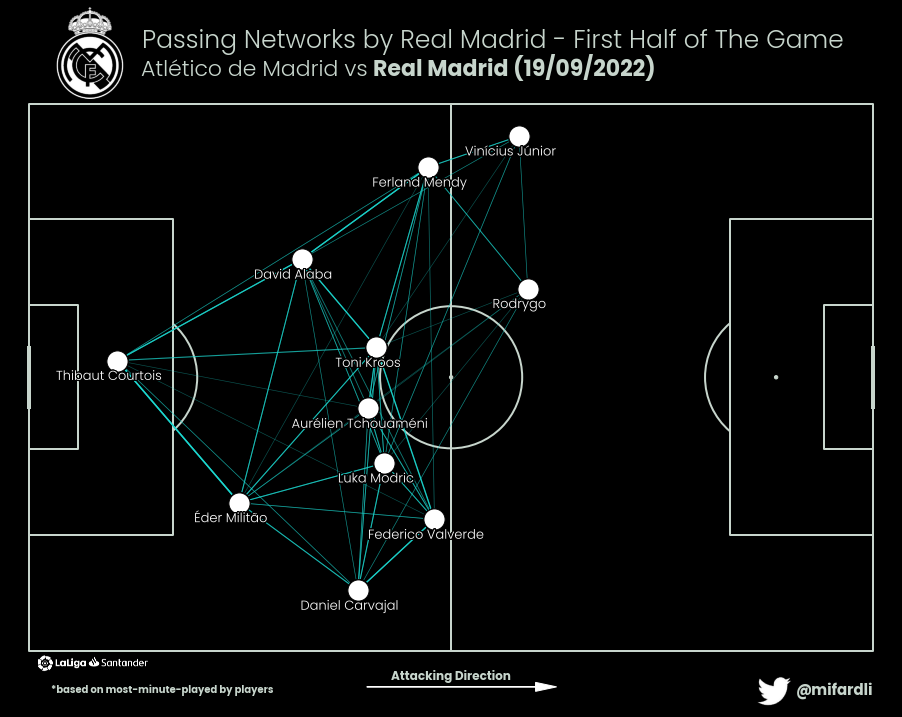

In [27]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.colors import to_rgba
import matplotlib.patheffects as patheffects

MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('#1CD6CE'))
color = np.tile(color, (len(pass_rma), 1))
c_transparency = pass_rma.number_pass / pass_rma.number_pass.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

pitch = Pitch(pitch_type='opta', pitch_color='black', line_color='#c7d5cc')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor("black")

pass_lines = pitch.lines(pass_rma.pos_x_start, pass_rma.pos_y_start,
                         pass_rma.pos_x_end, pass_rma.pos_y_end, lw=pass_rma.width+0.5,
                         color=color, zorder=1, ax=axs['pitch'])

pass_nodes = pitch.scatter(pass_rma.pos_x_start, pass_rma.pos_y_start, s=450,
                           color='white', edgecolors='black', linewidth=1, alpha=1, ax=axs['pitch'])

for index, row in pass_rma.iterrows():
    pitch.annotate(row.playerId, xy=(row.pos_x_start-1, row.pos_y_start-3), c='white', va='center',
                   ha='center', size=13, ax=axs['pitch'], path_effects=[patheffects.withStroke(linewidth=2, foreground='black')], fontproperties=poppins_light.prop)
    
# endnote /title
axs['endnote'].text(1, 0.5, '@mifardli', color='#c7d5cc',
                    va='center', ha='right', fontsize=15, fontproperties=poppins_bold.prop)
axs['endnote'].text(0.5, 0.9, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12, fontproperties=poppins_bold.prop)
axs['endnote'].text(0.29, 0.5, '*based on most-minute-played by players', color='#c7d5cc',
                    va='center', ha='right', fontsize=10, fontproperties=poppins_bold.prop)
axs['endnote'].arrow(0.4, 0.6, 0.2, 0, head_width=0.25, head_length=0.025, ec='w', fc='w')
axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)
# add image
ax_image = add_image(
    rma_logos, fig, left=0.0478, bottom=0.8720, width=0.13, height=0.127
)
ax_image = add_image(
    twt_logos, fig, left=0.7800, bottom=0.02315, width=0.13, height=0.05
) 
ax_image = add_image(
    laliga_logos, fig, left=0.05, bottom=0.06315, width=0.13, height=0.05
) 
axs['title'].text(0.550, 0.7, 'Passing Networks by Real Madrid - First Half of The Game', color='#c7d5cc',
                  va='center', ha='center', fontsize=25, fontproperties=poppins_light.prop)
axs['title'].text(0.267, 0.2, 'Atlético de Madrid vs', color='#c7d5cc',
                  va='center', ha='center', fontsize=22, fontproperties=poppins_light.prop)

axs['title'].text(0.575, 0.23, 'Real Madrid (19/09/2022)', color='#c7d5cc',
                  va='center', ha='center', fontsize=22, fontproperties=poppins_bold.prop)

   # these values might differ when you are plotting

# axs['title'].text(0.5, 0.00003, 'First Half of The Game', color='#c7d5cc',
#                   va='center', ha='center', fontsize=18)
# plt.savefig('Passing Networks.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
second_half

,id,playerId,teamId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY
773,2.462266e+09,NaN,52,45,0.0,Start,Successful,0.0,0.0,NaN,NaN
774,2.462266e+09,NaN,63,45,0.0,Start,Successful,0.0,0.0,NaN,NaN
775,2.462266e+09,125547.0,63,45,0.0,Pass,Successful,49.8,49.9,34.2,33.9
776,2.462266e+09,25191.0,63,45,3.0,Pass,Successful,34.7,34.6,39.3,42.7
777,2.462266e+09,91978.0,63,45,4.0,Pass,Successful,39.8,42.7,38.7,60.0
...,...,...,...,...,...,...,...,...,...,...,...
1624,2.462296e+09,337879.0,52,94,25.0,Pass,Successful,32.8,46.3,19.7,24.1
1625,2.462296e+09,106883.0,52,94,28.0,BallRecovery,Successful,19.7,24.1,NaN,NaN
1626,2.462296e+09,106883.0,52,94,30.0,Pass,Successful,19.9,5.6,46.9,4.4
1627,2.462296e+09,NaN,52,94,32.0,End,Successful,0.0,0.0,NaN,NaN


In [29]:
#filter type_displayName with only 'Pass' value
second_half= second_half[second_half['type_displayName'] == 'Pass']

In [30]:
#convert column type to integer
convert_dict = {'playerId': int
                }
second_half = second_half.astype(convert_dict)

In [31]:
#convert column type to object/str
convert_dict = {'playerId': str
                }
second_half = second_half.astype(convert_dict)

In [32]:
#replace playerId column with extracted json file
second_half=second_half.replace({"playerId": values})
second_half

,id,playerId,teamId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY
775,2.462266e+09,Rodrigo de Paul,63,45,0.0,Pass,Successful,49.8,49.9,34.2,33.9
776,2.462266e+09,Axel Witsel,63,45,3.0,Pass,Successful,34.7,34.6,39.3,42.7
777,2.462266e+09,Geoffrey Kondogbia,63,45,4.0,Pass,Successful,39.8,42.7,38.7,60.0
778,2.462266e+09,Koke,63,45,6.0,Pass,Successful,39.1,61.1,37.2,87.1
779,2.462266e+09,Reinildo,63,45,9.0,Pass,Successful,37.2,87.1,23.8,63.3
...,...,...,...,...,...,...,...,...,...,...,...
1620,2.462296e+09,Antonio Rüdiger,52,94,16.0,Pass,Unsuccessful,34.8,94.4,58.5,92.3
1622,2.462296e+09,Felipe,63,94,19.0,Pass,Successful,31.9,10.0,11.9,35.8
1623,2.462296e+09,Jan Oblak,63,94,22.0,Pass,Unsuccessful,12.5,33.7,68.9,50.7
1624,2.462296e+09,Éder Militão,52,94,25.0,Pass,Successful,32.8,46.3,19.7,24.1


In [33]:
#convert the teamId column data type into str
convert_dict = {'teamId': str
                }
second_half = second_half.astype(convert_dict)

In [34]:
#replace the column teamId with dictionary that has been prepared
second_half=second_half.replace({"teamId": svalues})
second_half

,id,playerId,teamId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY
775,2.462266e+09,Rodrigo de Paul,Atletico de Madrid,45,0.0,Pass,Successful,49.8,49.9,34.2,33.9
776,2.462266e+09,Axel Witsel,Atletico de Madrid,45,3.0,Pass,Successful,34.7,34.6,39.3,42.7
777,2.462266e+09,Geoffrey Kondogbia,Atletico de Madrid,45,4.0,Pass,Successful,39.8,42.7,38.7,60.0
778,2.462266e+09,Koke,Atletico de Madrid,45,6.0,Pass,Successful,39.1,61.1,37.2,87.1
779,2.462266e+09,Reinildo,Atletico de Madrid,45,9.0,Pass,Successful,37.2,87.1,23.8,63.3
...,...,...,...,...,...,...,...,...,...,...,...
1620,2.462296e+09,Antonio Rüdiger,Real Madrid,94,16.0,Pass,Unsuccessful,34.8,94.4,58.5,92.3
1622,2.462296e+09,Felipe,Atletico de Madrid,94,19.0,Pass,Successful,31.9,10.0,11.9,35.8
1623,2.462296e+09,Jan Oblak,Atletico de Madrid,94,22.0,Pass,Unsuccessful,12.5,33.7,68.9,50.7
1624,2.462296e+09,Éder Militão,Real Madrid,94,25.0,Pass,Successful,32.8,46.3,19.7,24.1


In [35]:
team = second_half.teamId.values.tolist()
passer = second_half.playerId.values.tolist()
receiver = second_half.playerId.shift(-1).tolist()
team_receiver = second_half.teamId.shift(-1).tolist()
pass_outcome = second_half.outcomeType_displayName.values.tolist()
x = second_half.x.values.tolist()
y = second_half.y.values.tolist()

pass_net_df = pd.DataFrame({
    'team' : team,
    'team_receiver' : team_receiver,
    'passer' : passer,
    'receiver' : receiver,
    'pass_outcome' : pass_outcome,
    'x' : x,
    'y' : y
})

pass_net_df = pass_net_df[pass_net_df.pass_outcome == 'Successful']
pass_net_df = pass_net_df[pass_net_df.team == pass_net_df.team_receiver]
pass_net_df['pair'] = pass_net_df['passer'] + pass_net_df['receiver']

pass_net_df.head()

,team,team_receiver,passer,receiver,pass_outcome,x,y,pair
0,Atletico de Madrid,Atletico de Madrid,Rodrigo de Paul,Axel Witsel,Successful,49.8,49.9,Rodrigo de PaulAxel Witsel
1,Atletico de Madrid,Atletico de Madrid,Axel Witsel,Geoffrey Kondogbia,Successful,34.7,34.6,Axel WitselGeoffrey Kondogbia
2,Atletico de Madrid,Atletico de Madrid,Geoffrey Kondogbia,Koke,Successful,39.8,42.7,Geoffrey KondogbiaKoke
3,Atletico de Madrid,Atletico de Madrid,Koke,Reinildo,Successful,39.1,61.1,KokeReinildo
4,Atletico de Madrid,Atletico de Madrid,Reinildo,Felipe,Successful,37.2,87.1,ReinildoFelipe


In [36]:
pass_count = pass_net_df.groupby(['pair']).count().reset_index()
pass_count = pass_count[['pair', 'team_receiver']]
pass_count.columns = ['pair', 'number_pass']
pass_count

,pair,number_pass
0,Antoine GriezmannAxel Witsel,3
1,Antoine GriezmannFelipe,1
2,Antoine GriezmannGeoffrey Kondogbia,4
3,Antoine GriezmannKoke,2
4,Antoine GriezmannMarcos Llorente,2
...,...,...
203,Éder MilitãoDaniel Carvajal,6
204,Éder MilitãoDavid Alaba,6
205,Éder MilitãoEduardo Camavinga,1
206,Éder MilitãoLuka Modric,3


In [37]:
avg_loc_df = second_half[['teamId', 'playerId', 'x', 'y']]
avg_loc_df.head()

,teamId,playerId,x,y
775,Atletico de Madrid,Rodrigo de Paul,49.8,49.9
776,Atletico de Madrid,Axel Witsel,34.7,34.6
777,Atletico de Madrid,Geoffrey Kondogbia,39.8,42.7
778,Atletico de Madrid,Koke,39.1,61.1
779,Atletico de Madrid,Reinildo,37.2,87.1


In [38]:
import numpy as np

avg_loc_df['pos_x'] = avg_loc_df.x.apply(lambda x: x)
avg_loc_df['pos_y'] = avg_loc_df.y.apply(lambda y: y)
avg_loc_df = avg_loc_df.drop('x', axis=1)
avg_loc_df = avg_loc_df.drop('y', axis=1)

avg_loc_df = avg_loc_df.groupby(['teamId','playerId']).agg({'pos_x': np.mean, 'pos_y': np.mean}).reset_index()

avg_loc_df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21624\4115949419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_loc_df['pos_x'] = avg_loc_df.x.apply(lambda x: x)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21624\4115949419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_loc_df['pos_y'] = avg_loc_df.y.apply(lambda y: y)


,teamId,playerId,pos_x,pos_y
0,Atletico de Madrid,Antoine Griezmann,70.558065,31.577419
1,Atletico de Madrid,Axel Witsel,42.883784,54.516216
2,Atletico de Madrid,Felipe,42.057500,27.897500
3,Atletico de Madrid,Geoffrey Kondogbia,47.496774,39.545161
4,Atletico de Madrid,Jan Oblak,7.700000,46.237500


In [39]:
# #Merge
pass_merge = pass_net_df.merge(pass_count, on='pair')
pass_merge = pass_merge[['passer', 'receiver', 'number_pass']]
pass_merge = pass_merge.drop_duplicates()
pass_merge.head()

pass_merge = pass_merge.rename(columns={'passer': 'playerId'})

In [40]:
avg_loc_df = avg_loc_df[['playerId', 'pos_x', 'pos_y']]

pass_cleaned = pass_merge.merge(avg_loc_df, on='playerId')
pass_cleaned.rename({'pos_x': 'pos_x_start', 'pos_y': 'pos_y_start'}, axis='columns', inplace=True)

pass_cleaned = pass_cleaned.merge(avg_loc_df, left_on='receiver', right_on='playerId', suffixes=['', '_end'])
pass_cleaned.rename({'pos_x': 'pos_x_end', 'pos_y': 'pos_y_end'}, axis='columns', inplace=True)

pass_cleaned = pass_cleaned.drop(['playerId_end'], axis=1)
pass_cleaned.head()

,playerId,receiver,number_pass,pos_x_start,pos_y_start,pos_x_end,pos_y_end
0,Rodrigo de Paul,Axel Witsel,3,63.141667,26.108333,42.883784,54.516216
1,Geoffrey Kondogbia,Axel Witsel,6,47.496774,39.545161,42.883784,54.516216
2,Koke,Axel Witsel,4,51.882143,55.682143,42.883784,54.516216
3,Reinildo,Axel Witsel,5,45.628125,77.246875,42.883784,54.516216
4,Felipe,Axel Witsel,5,42.057500,27.897500,42.883784,54.516216


In [41]:
rma_player_df = second_half[second_half.teamId == 'Real Madrid'].groupby('playerId').agg({'minute': [min, max]}).reset_index()
rma_player_df = pd.concat([rma_player_df['playerId'], rma_player_df['minute']], axis=1)
rma_player_df['minutes_played'] = rma_player_df['max'] - rma_player_df['min']
rma_player_df = rma_player_df.sort_values('minutes_played', ascending=False)
rma_player_df

,playerId,min,max,minutes_played
3,Daniel Carvajal,45,94,49
11,Thibaut Courtois,45,94,49
14,Éder Militão,45,94,49
1,Aurélien Tchouaméni,45,93,48
4,David Alaba,45,86,41
6,Federico Valverde,45,86,41
8,Luka Modric,45,79,34
12,Toni Kroos,45,79,34
10,Rodrygo,50,83,33
13,Vinícius Júnior,49,81,32


In [42]:
rma_player_names = rma_player_df.playerId[:11].tolist()

pass_rma = pass_cleaned[pass_cleaned.playerId.isin(rma_player_names)]
pass_rma = pass_rma[pass_rma.receiver.isin(rma_player_names)]

print(pass_rma.shape)
pass_rma.head()

(76, 7)


,playerId,receiver,number_pass,pos_x_start,pos_y_start,pos_x_end,pos_y_end
115,Aurélien Tchouaméni,Luka Modric,4,44.492308,40.719231,44.296552,36.658621
116,Toni Kroos,Luka Modric,6,41.878788,74.551515,44.296552,36.658621
117,Éder Militão,Luka Modric,3,29.150000,27.545455,44.296552,36.658621
118,David Alaba,Luka Modric,1,26.336364,65.827273,44.296552,36.658621
119,Daniel Carvajal,Luka Modric,4,38.783871,12.870968,44.296552,36.658621


In [43]:
pass_rma['width'] = pass_rma['number_pass'] / pass_rma['number_pass'].max()
pass_rma.head()

,playerId,receiver,number_pass,pos_x_start,pos_y_start,pos_x_end,pos_y_end,width
115,Aurélien Tchouaméni,Luka Modric,4,44.492308,40.719231,44.296552,36.658621,0.666667
116,Toni Kroos,Luka Modric,6,41.878788,74.551515,44.296552,36.658621,1.000000
117,Éder Militão,Luka Modric,3,29.150000,27.545455,44.296552,36.658621,0.500000
118,David Alaba,Luka Modric,1,26.336364,65.827273,44.296552,36.658621,0.166667
119,Daniel Carvajal,Luka Modric,4,38.783871,12.870968,44.296552,36.658621,0.666667


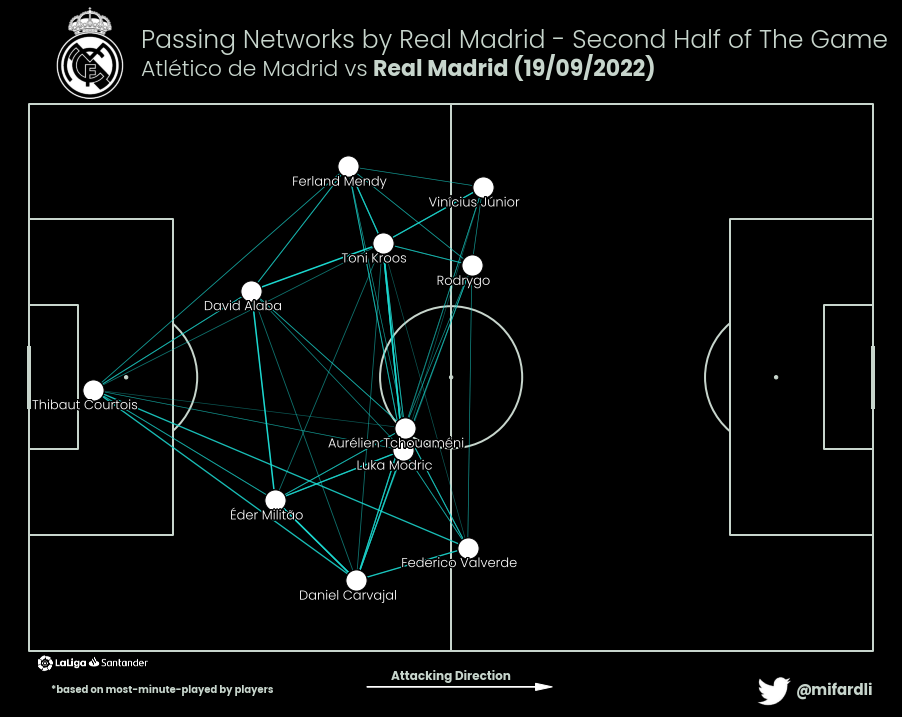

In [44]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.colors import to_rgba
import matplotlib.patheffects as patheffects

MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('#1CD6CE'))
color = np.tile(color, (len(pass_rma), 1))
c_transparency = pass_rma.number_pass / pass_rma.number_pass.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

pitch = Pitch(pitch_type='opta', pitch_color='black', line_color='#c7d5cc')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor("black")

pass_lines = pitch.lines(pass_rma.pos_x_start, pass_rma.pos_y_start,
                         pass_rma.pos_x_end, pass_rma.pos_y_end, lw=pass_rma.width+0.5,
                         color=color, zorder=1, ax=axs['pitch'])

pass_nodes = pitch.scatter(pass_rma.pos_x_start, pass_rma.pos_y_start, s=450,
                           color='white', edgecolors='black', linewidth=1, alpha=1, ax=axs['pitch'])

for index, row in pass_rma.iterrows():
    pitch.annotate(row.playerId, xy=(row.pos_x_start-1, row.pos_y_start-3), c='white', va='center',
                   ha='center', size=13, ax=axs['pitch'], path_effects=[patheffects.withStroke(linewidth=2, foreground='black')], fontproperties=poppins_light.prop)
    
# endnote /title
axs['endnote'].text(1, 0.5, '@mifardli', color='#c7d5cc',
                    va='center', ha='right', fontsize=15, fontproperties=poppins_bold.prop)
axs['endnote'].text(0.29, 0.5, '*based on most-minute-played by players', color='#c7d5cc',
                    va='center', ha='right', fontsize=10, fontproperties=poppins_bold.prop)
axs['endnote'].text(0.5, 0.9, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12, fontproperties=poppins_bold.prop)
axs['endnote'].arrow(0.4, 0.6, 0.2, 0, head_width=0.2, head_length=0.02, ec='w', fc='w')
axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)
# add image
ax_image = add_image(
    rma_logos, fig, left=0.0478, bottom=0.8720, width=0.13, height=0.127
)
ax_image = add_image(
    twt_logos, fig, left=0.7800, bottom=0.02315, width=0.13, height=0.05
)
ax_image = add_image(
    laliga_logos, fig, left=0.05, bottom=0.06315, width=0.13, height=0.05
) 
axs['title'].text(0.575, 0.7, 'Passing Networks by Real Madrid - Second Half of The Game', color='#c7d5cc',
                  va='center', ha='center', fontsize=25, fontproperties=poppins_light.prop)
axs['title'].text(0.267, 0.2, 'Atlético de Madrid vs', color='#c7d5cc',
                  va='center', ha='center', fontsize=22, fontproperties=poppins_light.prop)

axs['title'].text(0.575, 0.23, 'Real Madrid (19/09/2022)', color='#c7d5cc',
                  va='center', ha='center', fontsize=22, fontproperties=poppins_bold.prop)

   # these values might differ when you are plotting

# axs['title'].text(0.5, 0.00003, 'First Half of The Game', color='#c7d5cc',
#                   va='center', ha='center', fontsize=18)
# plt.savefig('Passing Networks.png', dpi=300, bbox_inches='tight')
plt.show()

In [45]:
# pass_raw = first_half[df.type_displayName == 'Pass']
# pass_raw.head(7)

In [46]:
# pass_number_raw = pass_raw[['minute', 'second', 'playerId']]
# pass_number_raw.head()